## Importing Requirements

In [852]:
import pandas as pd
import numpy as np


from io import StringIO
import requests

# Visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo



import re

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [853]:
data = pd.read_csv('investments_VC.csv',encoding = 'unicode_escape')

In [854]:
df= data.copy()

In [855]:
df.shape

(54294, 39)

In [856]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [857]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      49438 non-null object
status                  48124 non-null object
country_code            44165 non-null object
state_code              30161 non-null object
region                  44165 non-null object
city                    43322 non-null object
funding_rounds          49438 non-null float64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null float64
venture       

## Problems

- null values in all col
- name col is full of nan
- in total funding col nan value is represented by '-'
- no need of seperate round col 
- category_list col values are not in appropriate manner
- date cpl has null value and incorrect data type
- round a to round g too many 0 values and incorrect data tpye
- no need of founded_month col
- founded_quarter col must carry the quarter number        

In [858]:
df=df.dropna(how='any', subset=['name'])

In [859]:
df['category_list'].replace(to_replace = r"\W",value=',',regex= True,inplace= True)

In [860]:
df['category_list'].replace(to_replace = r'^,',value='',regex= True,inplace= True)
df['category_list'].replace(to_replace = r'E,Commerce',value='E-Commerce',regex= True,inplace= True)

In [861]:
df = pd.melt(df,id_vars=['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding'],var_name = 'gen_funding_round',value_name='funding_amount')

In [862]:
df = pd.melt(df,id_vars=['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'gen_funding_round','funding_amount'],var_name = 'invest_round_type',value_name='amount_given')

In [863]:

df=df[df['funding_amount']!=0.0]

df=df[df['amount_given']!=0.0]

In [864]:
df.shape

(26600, 22)

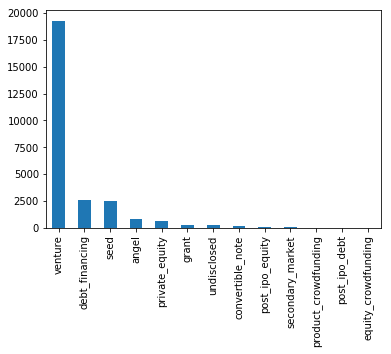

In [865]:
df['invest_round_type'].value_counts().plot(kind='bar')

## vanture capitalist invested in most of the startups

In [866]:
df['status'].value_counts()

operating    20963
acquired      4096
closed        1105
Name: status, dtype: int64

## closed startup is less so startup have created employement

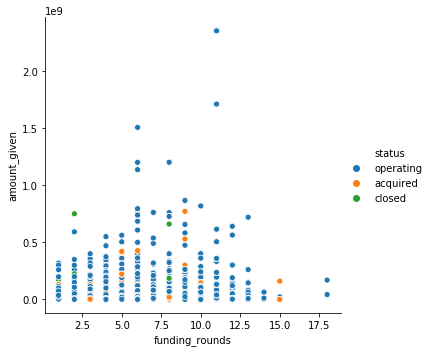

In [867]:
sns.relplot(x='funding_rounds',y='amount_given',hue='status',data=df)

## possibility of closing down is high if funding is not managed. 
### Once survived to get funded, makes easy to get funding from investers.
#### and after geting more than 7 time of funding the startup dosen't colse down at all but may a possibility of getting acquired (selling of the company) is there.

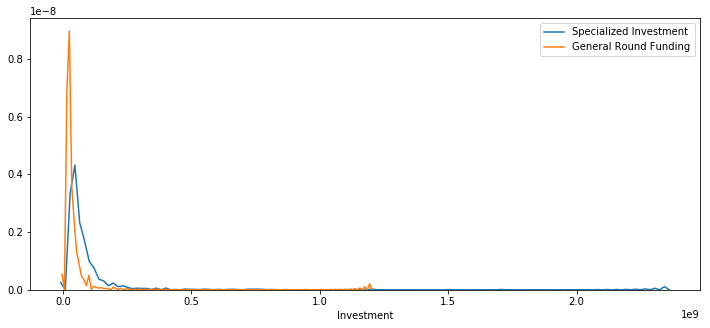

In [868]:
plt.subplots(figsize=(12,5))
sns.distplot(df['amount_given'],hist=False,label='Specialized Investment')
sns.distplot(df['funding_amount'],hist=False,label='General Round Funding')
plt.xlabel('Investment')
plt.show()

## Specialized Investment like venturi, seed, equity are more effictivly provides funding to the startups over General Investment round 

In [919]:
x=df[' market '].value_counts().reset_index()
trace = go.Bar(x=x['index'],y=x[' market '])
data=[trace]
layout = go.Layout(title = 'Startup Markets',xaxis={'title':'Market_Zone'},yaxis={'title':'Count'})
fig = go.Figure(data=data,layout=layout)
pyo.iplot(fig)

## World Wide successful startup markets

In [869]:
df[df['founded_year'].isna()]

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,last_funding_at,gen_funding_round,funding_amount,invest_round_type,amount_given
816,/organization/actacell,Actacell,http://www.actacell.com,"Search,Batteries,Clean,Technology,",Clean Technology,"98,00,000",acquired,USA,TX,Austin,...,NaN,NaN,NaN,NaN,2008-07-22,2010-12-29,round_A,5800000.0,seed,1000000.0
1685,/organization/airway-therapeutics,Airway Therapeutics,http://www.airwaytherapeutics.com,"Biotechnology,",Biotechnology,"51,00,000",operating,USA,OH,Cincinnati,...,NaN,NaN,NaN,NaN,2011-06-06,2014-09-10,round_A,4600000.0,seed,500000.0
2239,/organization/american-hometown-media,American Hometown Media,http://www.americanhometownmedia.com,NaN,NaN,"55,19,437",operating,USA,TN,Nashville,...,NaN,NaN,NaN,NaN,2011-12-09,2013-03-01,round_A,1655701.0,seed,3863736.0
3808,/organization/auspherix,Auspherix,NaN,"Health,Care,",Health Care,"18,55,753",operating,NOR,NaN,Aust-Agder,...,NaN,NaN,NaN,NaN,2013-12-03,2014-10-23,round_A,877127.0,seed,978626.0
4137,/organization/ayalogic,Ayalogic,http://imvox.com,"Chat,Audio,VoIP,Games,",VoIP,"10,71,500",closed,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2004-10-31,2010-11-15,round_A,296500.0,seed,270000.0
6204,/organization/brainly-com,Brainly,http://brainly.com,"All,Students,Education,",Education,"95,00,000",operating,POL,NaN,Krakow,...,NaN,NaN,NaN,NaN,2012-09-13,2014-10-14,round_A,9000000.0,seed,500000.0
8412,/organization/citrus-lane,Citrus Lane,http://citruslane.com,"Subscription,Businesses,Kids,E-Commerce,",Subscription Businesses,"66,00,000",NaN,USA,CA,SF Bay Area,...,NaN,NaN,NaN,NaN,2011-07-22,2012-04-24,round_A,5100000.0,seed,1500000.0
8728,/organization/clickscanshare,ClickScanShare,http://www.clickscanshare.com/,"Photography,",Photography,"3,20,000",operating,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2012-06-01,2012-09-01,round_A,180000.0,seed,140000.0
9042,/organization/coachclub,CoachClub,http://us.coachclub.com/us,NaN,NaN,"60,00,000",NaN,FRA,NaN,FRA - Other,...,NaN,NaN,NaN,NaN,2009-01-28,2011-04-11,round_A,5000000.0,seed,1000000.0
9611,/organization/confluence-life-sciences,Confluence Life Sciences,http://www.confluencelifesciences.com,"Biotechnology,",Biotechnology,"64,70,000",operating,USA,MO,St. Louis,...,NaN,NaN,NaN,NaN,2011-04-01,2014-02-19,round_A,5500000.0,seed,970000.0


In [870]:
   
df.drop(columns=['founded_at','founded_month'],inplace=True)

In [871]:
df.fillna(0)

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_quarter,founded_year,first_funding_at,last_funding_at,gen_funding_round,funding_amount,invest_round_type,amount_given
15,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,"Education,",Education,"44,00,000",operating,GBR,0,London,London,2.0,2013-Q1,2013.0,2013-01-01,2014-10-09,round_A,4000000.0,seed,400000.0
20,/organization/1000memories,1000memories,http://1000memories.com,"Curated,Web,",Curated Web,"25,35,000",acquired,USA,CA,SF Bay Area,San Francisco,2.0,2010-Q3,2010.0,2010-01-01,2011-02-16,round_A,2520000.0,seed,15000.0
22,/organization/1001-menus,1001 Menus,http://1001menus.com,"Local,Businesses,Restaurants,",Restaurants,"40,59,079",operating,FRA,0,Paris,Paris,4.0,2010-Q4,2010.0,2012-12-15,2013-11-13,round_A,3536910.0,seed,522169.0
150,/organization/2houses,2houses,http://www.2houses.com,"Curated,Web,",Curated Web,"9,66,728",operating,BEL,0,Brussels,Bel,2.0,2011-Q2,2011.0,2011-08-08,2012-11-09,round_A,860102.0,seed,106626.0
160,/organization/2u,2U,http://2U.com,"Software,Education,",Software,"9,58,75,000",operating,USA,MD,Baltimore,Hanover,6.0,2008-Q1,2008.0,2009-03-25,2013-10-21,round_A,10000000.0,seed,2275000.0
172,/organization/33across,33Across,http://www.33across.com,"Social,Network,Media,Advertising,",Advertising,"2,56,54,560",operating,USA,NY,New York City,New York,5.0,2007-Q3,2007.0,2009-02-06,2012-07-19,round_A,1284560.0,seed,750000.0
264,/organization/4-tell,4-Tell,http://4-tell.com,"E-Commerce,",E-Commerce,"22,34,979",operating,USA,WA,WA - Other,Stevenson,5.0,2009-Q2,2009.0,2011-07-01,2013-07-26,round_A,1000000.0,seed,25000.0
266,/organization/404-found,404 Found!,0,"Enterprise,Software,",Enterprise Software,"62,46,800",operating,0,0,0,0,2.0,1997-Q1,1997.0,1999-07-01,2000-07-01,round_A,5733600.0,seed,513200.0
273,/organization/42floors,42Floors,http://42floors.com,"Commercial,Real,Estate,Real,Estate,",Commercial Real Estate,"1,74,00,000",operating,USA,CA,SF Bay Area,San Francisco,4.0,2011-Q1,2011.0,2011-09-01,2013-01-31,round_A,5000000.0,seed,400000.0
310,/organization/500friends,500Friends,http://www.500Friends.com,"Loyalty,Programs,Social,Media,E-Commerce,Enter...",E-Commerce,"1,29,00,000",acquired,USA,CA,SF Bay Area,San Francisco,6.0,2010-Q1,2010.0,2009-12-15,2013-03-12,round_A,4500000.0,seed,1400000.0


In [872]:
df['founded_year']=pd.to_datetime(df['founded_year'])


In [873]:
try:
    df['first_funding_at']=pd.to_datetime(df['first_funding_at'])
except:
    pass

In [874]:
df['last_funding_at']=pd.to_datetime(df['last_funding_at'])

In [875]:
df['amount_given']=df['amount_given'].astype(int)

In [876]:
df['funding_amount']=df['funding_amount'].astype(int)

In [877]:
dft=df[df['name'].duplicated()]

In [878]:
dft.shape

(13852, 20)

In [879]:
dft.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_quarter,founded_year,first_funding_at,last_funding_at,gen_funding_round,funding_amount,invest_round_type,amount_given
49597,/organization/2u,2U,http://2U.com,"Software,Education,",Software,"9,58,75,000",operating,USA,MD,Baltimore,Hanover,6.0,2008-Q1,1970-01-01 00:00:00.000002008,2009-03-25,2013-10-21,round_B,20000000,seed,2275000
49609,/organization/33across,33Across,http://www.33across.com,"Social,Network,Media,Advertising,",Advertising,"2,56,54,560",operating,USA,NY,New York City,New York,5.0,2007-Q3,1970-01-01 00:00:00.000002007,2009-02-06,2012-07-19,round_B,9000000,seed,750000
49710,/organization/42floors,42Floors,http://42floors.com,"Commercial,Real,Estate,Real,Estate,",Commercial Real Estate,"1,74,00,000",operating,USA,CA,SF Bay Area,San Francisco,4.0,2011-Q1,1970-01-01 00:00:00.000002011,2011-09-01,2013-01-31,round_B,12000000,seed,400000
49747,/organization/500friends,500Friends,http://www.500Friends.com,"Loyalty,Programs,Social,Media,E-Commerce,Enter...",E-Commerce,"1,29,00,000",acquired,USA,CA,SF Bay Area,San Francisco,6.0,2010-Q1,1970-01-01 00:00:00.000002010,2009-12-15,2013-03-12,round_B,5000000,seed,1400000
50003,/organization/ablative-solutions,Ablative Solutions,http://ablativesolutions.com,"Biotechnology,",Biotechnology,"2,59,30,577",operating,USA,MI,Kalamazoo,Kalamazoo,5.0,2011-Q1,1970-01-01 00:00:00.000002011,2012-01-04,2014-02-04,round_B,9575077,seed,5000


In [880]:
dft['country_code'].value_counts().head(10)

USA    10930
CHN      480
GBR      406
ISR      235
CAN      214
IND      162
FRA      139
DEU      123
JPN       75
RUS       74
Name: country_code, dtype: int64

## Top 10 Countries Based on  Number Of Startups Established

In [881]:
ddf=df.groupby('invest_round_type').sum().reset_index()

In [882]:
ddf

,invest_round_type,funding_rounds,funding_amount,amount_given
0,angel,3626.0,1.590544e+10,1.250715e+09
1,convertible_note,937.0,1.723619e+09,4.304677e+08
2,debt_financing,14336.0,4.422784e+10,3.828877e+10
3,equity_crowdfunding,40.0,9.577448e+07,2.402204e+07
4,grant,1481.0,5.973179e+09,2.472934e+09
5,post_ipo_debt,107.0,5.661347e+08,1.248882e+09
6,post_ipo_equity,526.0,2.482339e+09,1.756457e+10
7,private_equity,3767.0,1.667414e+10,5.299564e+10
8,product_crowdfunding,80.0,2.900758e+08,4.389265e+07
9,secondary_market,208.0,1.569086e+09,3.800410e+09


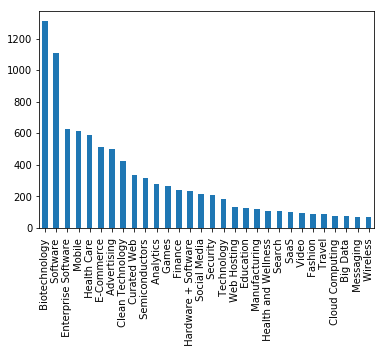

In [884]:
dft[' market '].value_counts().head(30).plot(kind='bar')


In [885]:
def tell_country(a): ## tells country related information of startups
    df_c=dft[dft['country_code']==a]
    plt.subplot(211)
    df_c['city'].value_counts().head(10).plot(kind='pie',figsize=(10,20),autopct='%1.1f%%')
    plt.subplot(212)
    df_c[' market '].value_counts().head(30).plot(kind='bar')

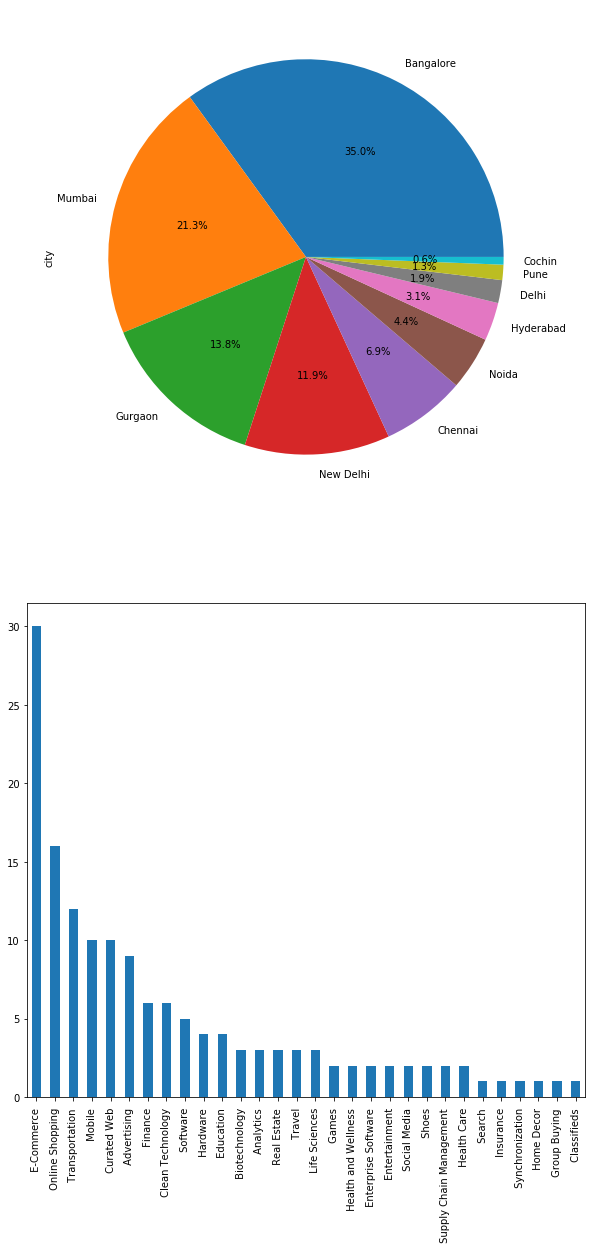

In [886]:
tell_country('IND')

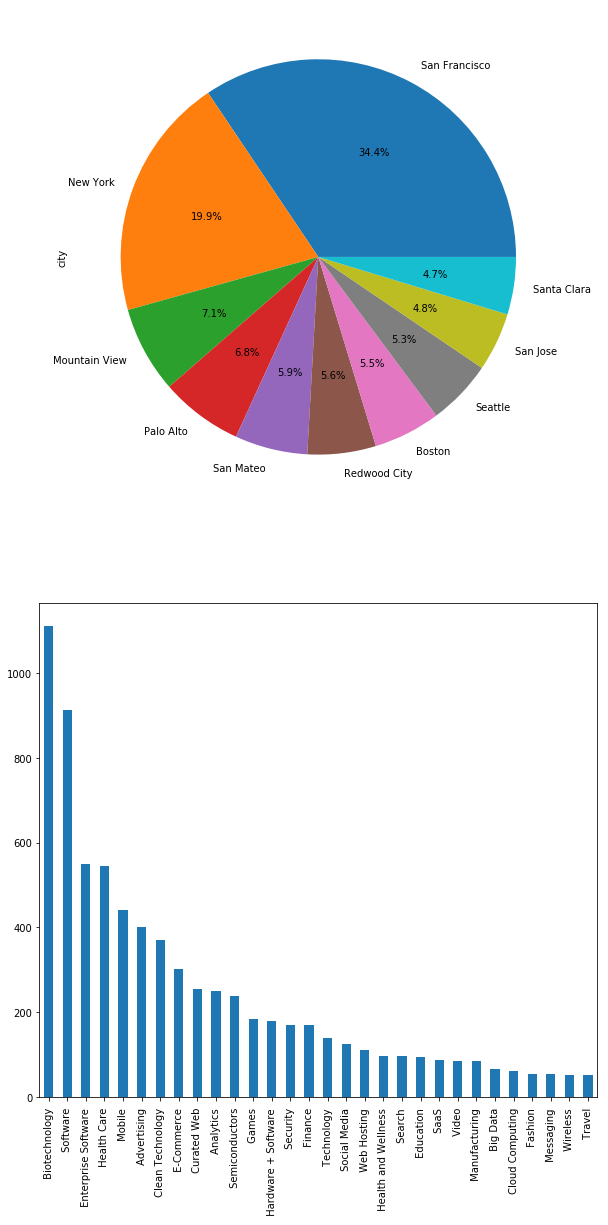

In [887]:
tell_country('USA')

In [893]:
x=dft[dft['homepage_url'].isnull()==False]

In [894]:
stri = []
for i in x['homepage_url']:
    stri.append(i)

In [895]:
l = len(stri)
i = 0
e = []
while i < l:
    y = stri[i].split('.')[len(stri[i].split('.'))-1]
    if ('/' in y == True):
        e.append(y.split('/')[0])
    else:
        e.append(y)
        
    i=i+1
    
x['domain']=e

In [896]:
x['domain'].replace(to_replace = r'^com[/w/.-]',value='com',regex= True,inplace=True)


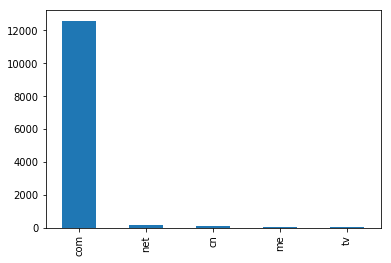

In [897]:
x['domain'].value_counts().head(5).plot(kind='bar')

## Most of the startups preffers .com domains 

In [917]:
dft['founded_quarter'].replace(to_replace = r'^[\d\d\d\d.-]+',value='',regex= True,inplace = True)

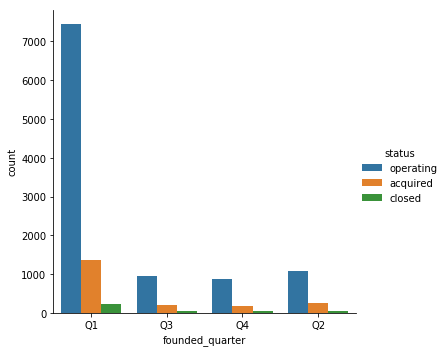

In [918]:
sns.catplot(x='founded_quarter',hue='status',kind='count', data=dft)

## first quarter is most important for startups